# Dimensionality Reduction

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# A: Creating Datasets
Steps:
* Generate 500 points from $\frac{x^2}{2^2}+ \frac{y^2}{5^2} \le 1$(From ellipse with 2, 5 radius on the x and y axes respectively). Example way:
    - Generate 500 angle values $\{\theta^t\}$ in range $[-\pi,+\pi]$
    - Generate 500 values $\{r^t\}$ in range $[0,1]$
    - Generate 500 points $\{x^t,y^t\}$ where $x^t = 2r^tsin(\theta^t)$ and $y^t = 5r^tcos(\theta^t)$.
* Generate 3 set of labels. Do it by dividing data using following Lines (eg. one side of line is label 0, other side is label 1)
    - $y=0$ line
    - $x=0$ line 
    - $y=3x +1$ line 
* Visualize points with each set of labels in subplots with 1 row, 3 columns where each column corresponds to one set of labels. (Use different colors for each label.)  

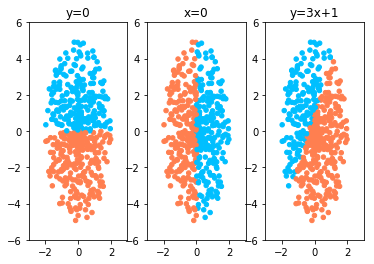

In [0]:
teta = np.random.uniform(-1 * np.pi, np.pi, (1, 500))
r = np.random.uniform(0, 1, (1, 500))
x = 2 * r * np.sin(teta)
y = 5 * r * np.cos(teta)
label1 = [0 if y[0][p]<0 else 1 for p in range(500)]
label2 = [0 if x[0][p]<0 else 1 for p in range(500)]
label3 = [0 if y[0][p]-3*x[0][p]-1<0 else 1 for p in range(500)]

sub1 = plt.subplot(1, 3, 1)
sub1.set_title('y=0')
sub1.set_xlim(-3, 3)
sub1.set_ylim(-6, 6)
plt.scatter(x, y, s=20, c=['coral' if label1[p]==0 else 'deepskyblue' for p in range(500)])

sub2 = plt.subplot(1, 3, 2)
sub2.set_title('x=0')
sub2.set_xlim(-3, 3)
sub2.set_ylim(-6, 6)
plt.scatter(x, y, s=20, c=['coral' if label2[p]==0 else 'deepskyblue' for p in range(500)])

sub3 = plt.subplot(1, 3, 3)
sub3.set_title('y=3x+1')
sub3.set_xlim(-3, 3)
sub3.set_ylim(-6, 6)
plt.scatter(x, y, s=20, c=['coral' if label3[p]==0 else 'deepskyblue' for p in range(500)])

plt.show()

# B: Applying PCA
Steps:
* Write PCA function.
* Apply PCA to data you generated.
* Visualize each set of labels using first principle component. 
* Visualize each set of labels using second principle component. 

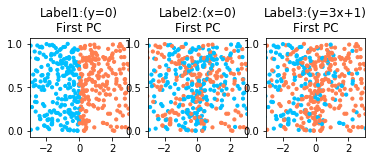

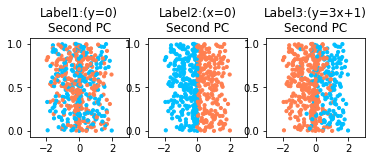

In [0]:
def PCA(xx):
  cov = np.cov(xx)
  eig_vals, eig_vectors = np.linalg.eig(cov)
  eig_vecs = [v for _, v in sorted(zip(eig_vals, eig_vectors), reverse=True)]
  return eig_vecs


xy = np.concatenate((x, y), axis=0)
pcs = PCA(xy)
first_pc = np.asarray(pcs[0])
x1 = np.dot(first_pc.T, xy)
second_pc = np.asarray(pcs[1])
x2 = np.dot(second_pc.T, xy)
y1 = np.random.rand(1,500)


sub11 = plt.subplot(2, 3, 1)
sub11.set_title('Label1:(y=0)\nFirst PC')
sub11.set_xlim(-3, 3)
plt.scatter(x1, y1 , s=10, c=['coral' if label1[p]==0 else 'deepskyblue' for p in range(500)])

sub12 = plt.subplot(2, 3, 2)
sub12.set_title('Label2:(x=0)\nFirst PC')
sub12.set_xlim(-3, 3)
plt.scatter(x1, y1 , s=10, c=['coral' if label2[p]==0 else 'deepskyblue' for p in range(500)])

sub13 = plt.subplot(2, 3, 3)
sub13.set_title('Label3:(y=3x+1)\nFirst PC')
sub13.set_xlim(-3, 3)
plt.scatter(x1, y1 , s=10, c=['coral' if label3[p]==0 else 'deepskyblue' for p in range(500)])

plt.show()

sub21 = plt.subplot(2, 3, 4)
sub21.set_title('Label1:(y=0)\nSecond PC')
sub21.set_xlim(-3, 3)
plt.scatter(x2, y1 , s=10, c=['coral' if label1[p]==0 else 'deepskyblue' for p in range(500)])

sub21 = plt.subplot(2, 3, 5)
sub21.set_title('Label2:(x=0)\nSecond PC')
sub21.set_xlim(-3, 3)
plt.scatter(x2, y1 , s=10, c=['coral' if label2[p]==0 else 'deepskyblue' for p in range(500)])

sub21 = plt.subplot(2, 3, 6)
sub21.set_title('Label3:(y=3x+1)\nSecond PC')
sub21.set_xlim(-3, 3)
plt.scatter(x2, y1 , s=10, c=['coral' if label3[p]==0 else 'deepskyblue' for p in range(500)])

plt.show()


# C: Applying LDA
Steps:
* Apply LDA(https://scikit-learn.org/stable/modules/lda_qda.html) to data for each label set. You can use sklearn implementation.
* Visualize each set of labels using first component of corresponding LDA. 

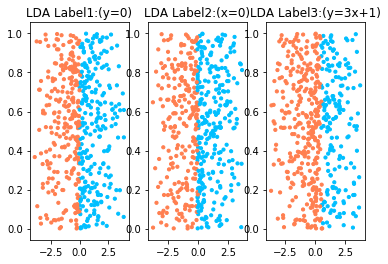

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
x_lda = lda.fit(xy.T, label1).transform(xy.T)

plt.subplot(1, 3, 1)
plt.scatter(x_lda, y1 , s=10, c=['coral' if label1[p]==0 else 'deepskyblue' for p in range(500)])
plt.title('LDA Label1:(y=0)')

x_lda = lda.fit(xy.T, label2).transform(xy.T)
plt.subplot(1, 3, 2)
plt.scatter(x_lda, y1 , s=10, c=['coral' if label2[p]==0 else 'deepskyblue' for p in range(500)])
plt.title('LDA Label2:(x=0)')
x_lda = lda.fit(xy.T, label3).transform(xy.T)
plt.subplot(1, 3, 3)
plt.scatter(x_lda, y1 , s=10, c=['coral' if label3[p]==0 else 'deepskyblue' for p in range(500)])
plt.title('LDA Label3:(y=3x+1)')

plt.show()

# D: Nonlinear Data
Steps:
* Use generated data below.
* Apply PCA and LDA to this data, and visualize it(seperately).

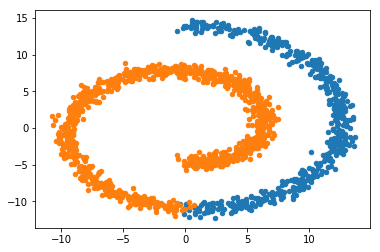

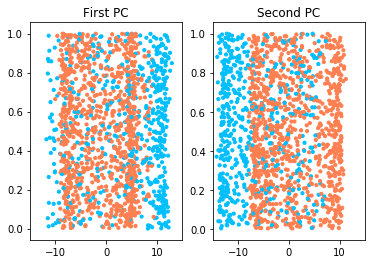

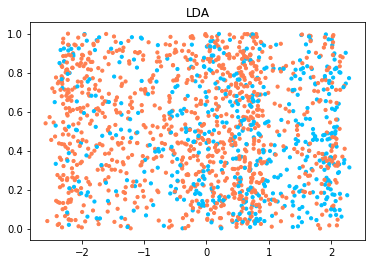

In [0]:
def genData():
    from sklearn.datasets import make_swiss_roll 
    n_samples = 1500
    noise = 0.5
    X, t = make_swiss_roll(n_samples, noise)
    # Make it thinner
    fig = plt.figure()
    Data = np.zeros([1500,2])
    Data[:,0] = X[:,0]
    Data[:,1] = X[:,2]
    Labels = np.zeros([1500,])
    Labels[t>11]=1

    plt.scatter(Data[Labels==1, 0], Data[Labels==1, 1],
       s=20,)
    plt.scatter(Data[Labels==0, 0], Data[Labels==0, 1],
       s=20,)
    plt.show()
    return Data,Labels
  
  
Data,Labels=genData()
pcs = PCA(Data.T)
f_pc = np.asarray(pcs[0])
s_pc = np.asarray(pcs[1])
data1 = np.dot(f_pc.T, Data.T)
data2 = np.dot(s_pc.T, Data.T)

plt.figure()
sub11 = plt.subplot(1, 2, 1)
sub11.set_title('First PC')
sub11.set_xlim(-15, 15)
plt.scatter(data1, np.random.rand(1, 1500) , s=10, c=['coral' if Labels[p]==0 else 'deepskyblue' for p in range(1500)])

sub11 = plt.subplot(1, 2, 2)
sub11.set_title('Second PC')
sub11.set_xlim(-15, 15)
plt.scatter(data2, np.random.rand(1, 1500) , s=10, c=['coral' if Labels[p]==0 else 'deepskyblue' for p in range(1500)])

plt.show()

plt.figure()

data_lda = lda.fit(Data, Labels).transform(Data)
plt.scatter(data_lda, np.random.rand(1, 1500) , s=10, c=['coral' if Labels[p]==0 else 'deepskyblue' for p in range(500)])
plt.title('LDA')

plt.show()
